<a href="https://colab.research.google.com/github/MOhitGuragain/dwdm/blob/main/Lab4/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1 Write a program to implement the k-means algorithm**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load dataset
df = pd.read_csv('/content/sample_data/data.csv')
X = df.values

Iteration 1 complete.
Iteration 2 complete.
Iteration 3 complete.
Iteration 4 complete.
   Feature_1  Feature_2  Cluster
0   2.248357   1.930868        2
1   2.323844   2.761515        2
2   1.882923   1.882932        2
3   2.789606   2.383717        2
4   1.765263   2.271280        2


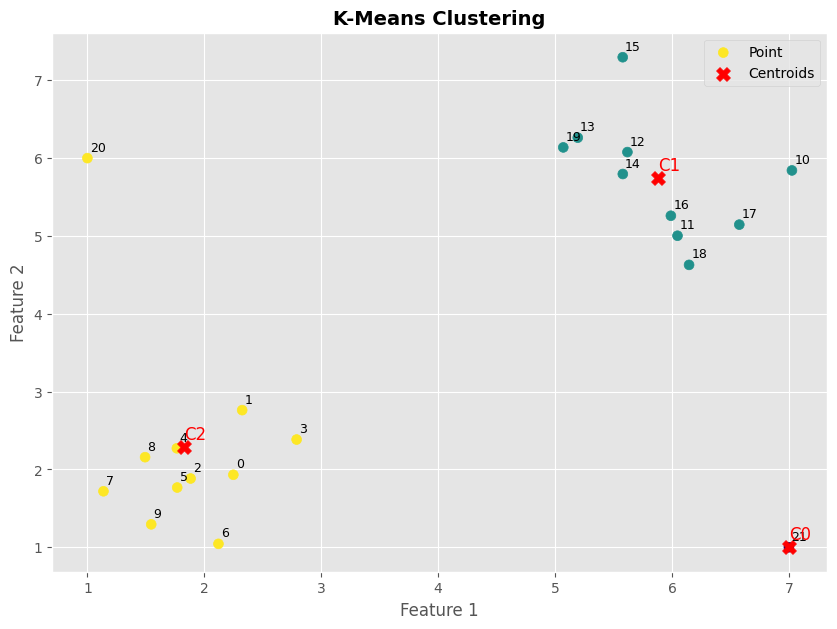

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2, axis=1))

def kmeans(data, k, max_iters=100, tol=1e-4, verbose=False):
    np.random.seed(42)
    indices = np.random.choice(len(data), k, replace=False)
    centroids = data[indices]

    for iteration in range(max_iters):
        clusters = []
        for point in data:
            distances = euclidean_distance(point, centroids)
            clusters.append(np.argmin(distances))
        clusters = np.array(clusters)

        old_centroids = centroids.copy()
        for i in range(k):
            points_in_cluster = data[clusters == i]
            if len(points_in_cluster) > 0:
                centroids[i] = np.mean(points_in_cluster, axis=0)

        if np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tol):
            break

        if verbose:
            print(f"Iteration {iteration + 1} complete.")

    return clusters, centroids

# Run K-means
k = 3
labels, final_centroids = kmeans(X, k, verbose=True)
df['Cluster'] = labels
print(df.head())

# Plot if 2D
plt.figure(figsize=(10, 7))


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label = "Point")

for idx, point in enumerate(X):
  plt.text(point[0] + 0.02, point[1] + 0.09, str(idx), fontsize=9, color='black')


plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', marker='X', s=100, label='Centroids')


for i, centroid in enumerate(final_centroids):
  plt.text(centroid[0], centroid[1] + 0.1, f'C{i}', fontsize=12, color='red')

plt.title("K-Means Clustering", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


# **Write a program to implement the k-means ++ algorithm**

Converged at iteration 4


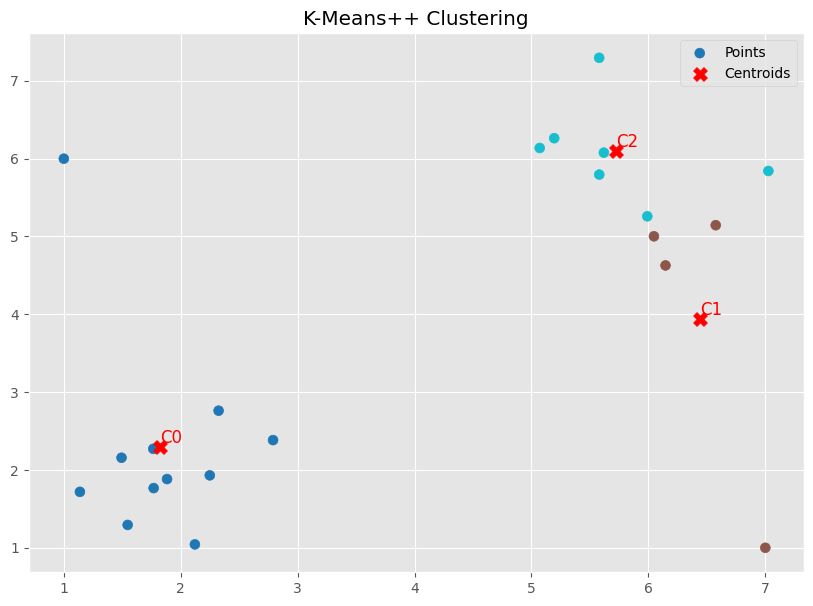

   Feature_1  Feature_2  Cluster
0   2.248357   1.930868        0
1   2.323844   2.761515        0
2   1.882923   1.882932        0
3   2.789606   2.383717        0
4   1.765263   2.271280        0


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def initialize_centroids_kmeanspp(X, k):
    np.random.seed(42)
    n_samples = X.shape[0]
    centroids = []


    first_idx = np.random.randint(n_samples)
    centroids.append(X[first_idx])


    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c)**2 for c in centroids) for x in X])
        probabilities = distances / distances.sum()
        next_idx = np.random.choice(n_samples, p=probabilities)
        centroids.append(X[next_idx])

    return np.array(centroids)

def kmeans_pp(X, k, max_iters=100, tol=1e-4, verbose=False):
    centroids = initialize_centroids_kmeanspp(X, k)

    for iteration in range(max_iters):

        labels = np.array([np.argmin([np.linalg.norm(x - c) for c in centroids]) for x in X])


        prev_centroids = centroids.copy()


        for i in range(k):
            points = X[labels == i]
            if len(points) > 0:
                centroids[i] = np.mean(points, axis=0)


        if np.all(np.linalg.norm(centroids - prev_centroids, axis=1) < tol):
            if verbose:
                print(f"Converged at iteration {iteration + 1}")
            break

    return labels, centroids


k = 3

# Run K-Means++
labels, centroids = kmeans_pp(X, k, verbose=True)
df['Cluster'] = labels

# Visualize if 2D
if X.shape[1] == 2:
    plt.figure(figsize=(10, 7))
    cmap = plt.get_cmap('tab10')
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, s=50, label='Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100, label='Centroids')
    plt.title("K-Means++ Clustering")
    for i, c in enumerate(centroids):
        plt.text(c[0], c[1]+0.05, f'C{i}', fontsize=12, color='red')
    plt.legend()
    plt.grid(True)
    plt.show()

# View clustered data
print(df.head())


# **Write a program to implement k-medoids algorithm.**


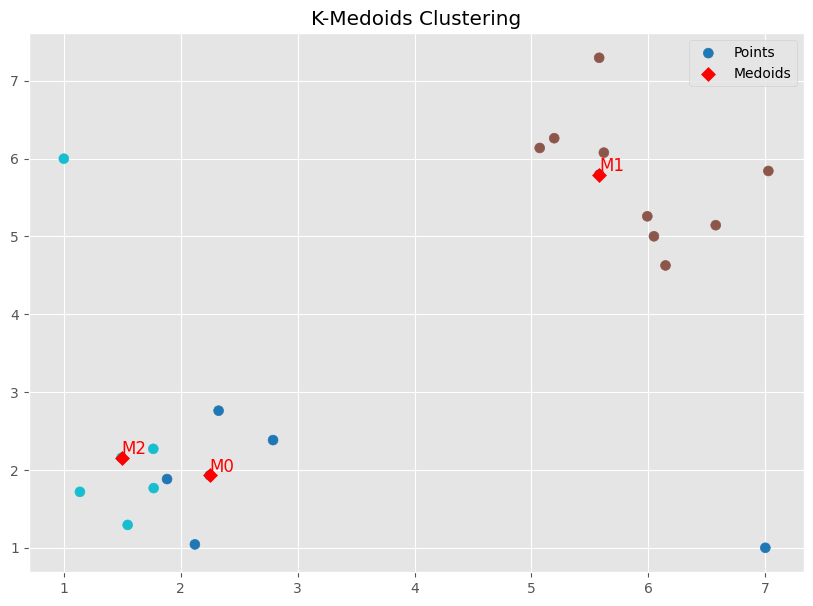

   Feature_1  Feature_2  Cluster
0   2.248357   1.930868        0
1   2.323844   2.761515        0
2   1.882923   1.882932        0
3   2.789606   2.383717        0
4   1.765263   2.271280        2


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b), axis=1)

def total_cost(X, medoids, labels):
    return sum(np.linalg.norm(X[i] - medoids[labels[i]]) for i in range(len(X)))

def kmedoids(X, k, max_iters=100):
    np.random.seed(42)
    m = len(X)

    # Initialize medoids randomly from data points
    medoid_indices = np.random.choice(m, k, replace=False)
    medoids = X[medoid_indices]

    for iteration in range(max_iters):
        # Step 1: Assign points to the nearest medoid
        labels = np.array([np.argmin([np.linalg.norm(x - m) for m in medoids]) for x in X])

        # Step 2: Update medoids
        new_medoids = medoids.copy()
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            # Compute the cost for each point in the cluster to be medoid
            costs = []
            for candidate in cluster_points:
                cost = sum(np.linalg.norm(candidate - p) for p in cluster_points)
                costs.append(cost)
            best_medoid = cluster_points[np.argmin(costs)]
            new_medoids[i] = best_medoid

        # Convergence check
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return labels, medoids

# Set number of clusters
k = 3

# Run K-Medoids
labels, medoids = kmedoids(X, k)
df['Cluster'] = labels

# Visualize if 2D
if X.shape[1] == 2:
    plt.figure(figsize=(10, 7))
    cmap = plt.get_cmap('tab10')
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, s=50, label='Points')
    plt.scatter(medoids[:, 0], medoids[:, 1], color='red', marker='D', s=50, label='Medoids')
    plt.title("K-Medoids Clustering")
    for i, c in enumerate(medoids):
        plt.text(c[0], c[1]+0.05, f'M{i}', fontsize=12, color='red')
    plt.legend()
    plt.grid(True)
    plt.show()

# View clustered data
print(df.head())


# **Write a program to implement an agglomerative hierarchical clustering algorithm.**

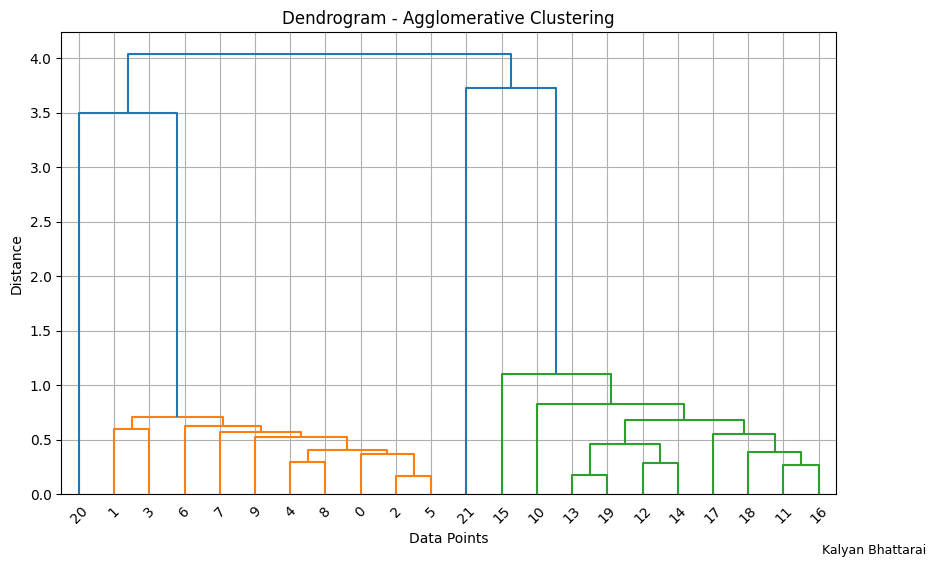

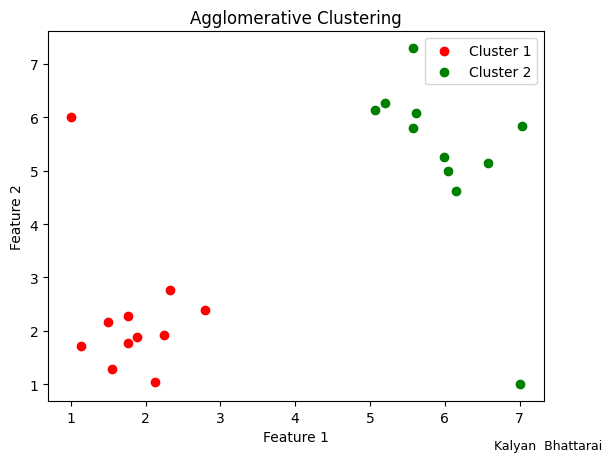

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def compute_distance_matrix(clusters):
    n = len(clusters)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist_matrix[i, j] = min(euclidean_distance(p1, p2)
                                        for p1 in clusters[i]
                                        for p2 in clusters[j])
            else:
                dist_matrix[i, j] = np.inf
    return dist_matrix

def agglomerative_clustering(X, k=2):
    # Step 1: Start with each point as its own cluster
    clusters = [[point] for point in X]

    while len(clusters) > k:
        dist_matrix = compute_distance_matrix(clusters)
        i, j = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)

        # Merge cluster j into cluster i and remove j
        clusters[i].extend(clusters[j])
        del clusters[j]

    return clusters

# Set desired number of clusters
num_clusters = 2
final_clusters = agglomerative_clustering(X, num_clusters)
def plot_dendrogram(X, method='single'):
    linked = linkage(X, method=method)  # method = 'single', 'complete', 'average', 'ward', etc.

    plt.figure(figsize=(10, 6))
    dendrogram(linked,
               orientation='top',
               distance_sort='ascending',
               show_leaf_counts=True)
    plt.title("Dendrogram - Agglomerative Clustering")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.figtext(0.99, 0.01, "Kalyan Bhattarai", ha="right", fontsize=9, color='black')
    plt.grid(True)
    plt.show()

# Example usage
plot_dendrogram(X)
print("\n")
# Plot if 2D
if X.shape[1] == 2:
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for idx, cluster in enumerate(final_clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[idx % len(colors)], label=f'Cluster {idx+1}')
    plt.title("Agglomerative Clustering")
    plt.figtext(0.99, 0.01, " Kalyan  Bhattarai", ha="right", fontsize=9, color='Black')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


# **Write a program to implement a divisive algorithm.**

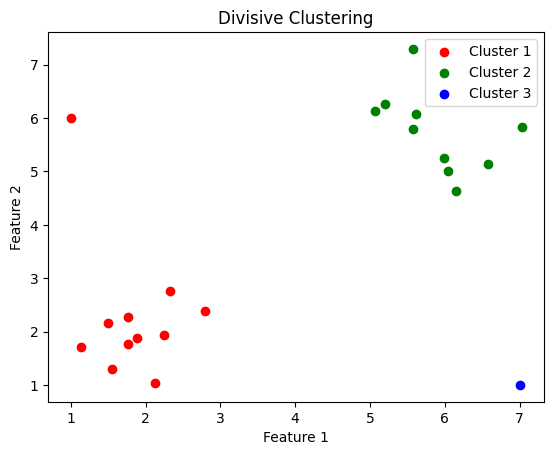

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Cluster structure
class ClusterNode:
    def __init__(self, points):
        self.points = points
        self.left = None
        self.right = None

def divisive_clustering(X, desired_clusters=2):
    # Start with one big cluster
    root = ClusterNode(X.tolist())
    clusters = [root]

    while len(clusters) < desired_clusters:
        # Find the cluster with max variance to split
        max_var_idx = np.argmax([np.var(c.points) for c in clusters])
        cluster_to_split = clusters.pop(max_var_idx)

        if len(cluster_to_split.points) <= 1:
            # Skip splitting if cluster has 1 or 0 points
            clusters.append(cluster_to_split)
            continue

        # Split using KMeans with k=2
        kmeans = KMeans(n_clusters=2, random_state=0).fit(cluster_to_split.points)
        labels = kmeans.labels_

        left_points = [p for i, p in enumerate(cluster_to_split.points) if labels[i] == 0]
        right_points = [p for i, p in enumerate(cluster_to_split.points) if labels[i] == 1]

        left_node = ClusterNode(left_points)
        right_node = ClusterNode(right_points)

        cluster_to_split.left = left_node
        cluster_to_split.right = right_node

        clusters.extend([left_node, right_node])

    return clusters

# Set desired number of clusters
num_clusters = 3
result_clusters = divisive_clustering(X, num_clusters)

# Plot clusters if 2D
if X.shape[1] == 2:
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    for idx, cluster in enumerate(result_clusters):
        points = np.array(cluster.points)
        plt.scatter(points[:, 0], points[:, 1], color=colors[idx % len(colors)], label=f'Cluster {idx+1}')
    plt.title("Divisive Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


# **Qno6. Write a program to implement the DBSCAN algorithm.**

In [10]:
# Load dataset
df = pd.read_csv('/content/sample_data/data2.csv')
X = df.values

/tmp/ipython-input-3835855455.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


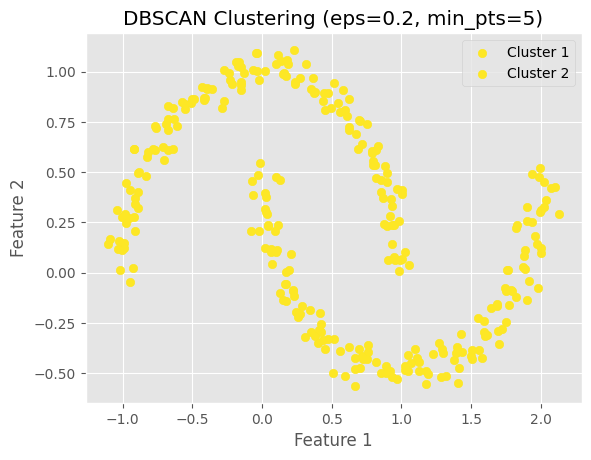

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def region_query(X, point_idx, eps):
    neighbors = []
    for i, point in enumerate(X):
        if euclidean_distance(X[point_idx], point) < eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_idx, cluster_id, eps, min_pts):
    neighbors = region_query(X, point_idx, eps)
    if len(neighbors) < min_pts:
        labels[point_idx] = -1  # Mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        queue = deque(neighbors)
        while queue:
            curr_idx = queue.popleft()
            if labels[curr_idx] == -1:
                labels[curr_idx] = cluster_id
            if labels[curr_idx] != 0:
                continue
            labels[curr_idx] = cluster_id
            curr_neighbors = region_query(X, curr_idx, eps)
            if len(curr_neighbors) >= min_pts:
                queue.extend(curr_neighbors)
        return True

def dbscan(X, eps=0.5, min_pts=5):
    labels = [0] * len(X)  # 0 = unvisited, -1 = noise, >0 = cluster id
    cluster_id = 0
    for point_idx in range(len(X)):
        if labels[point_idx] != 0:
            continue
        if expand_cluster(X, labels, point_idx, cluster_id + 1, eps, min_pts):
            cluster_id += 1
    return np.array(labels)

# ==== Example ====
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN
eps = 0.2
min_pts = 5
labels = dbscan(X, eps=eps, min_pts=min_pts)

# ==== Plot ====
unique_labels = set(labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))
for label in unique_labels:
    if label == -1:
        color = 'k'  # noise
        label_name = 'Noise'
    else:
        color = colors(label)
        label_name = f'Cluster {label}'
    plt.scatter(X[labels == label][:, 0], X[labels == label][:, 1], c=[color], label=label_name)

plt.title(f"DBSCAN Clustering (eps={eps}, min_pts={min_pts})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.show()


# **Write a program to perform outlier analysis using the Z-score method.**

In [ ]:
# Load dataset

X = df.values

Mean: 0.659
Standard Deviation: 7.189

Z-scores for each data point:
Index  0: Value =   1.000, Z-score =   0.047
Index  1: Value =   2.000, Z-score =   0.186
Index  2: Value =   3.000, Z-score =   0.326
Index  3: Value =   4.000, Z-score =   0.465
Index  4: Value =  10.000, Z-score =   1.299
Index  5: Value =   4.500, Z-score =   0.534
Index  6: Value = -10.000, Z-score =  -1.483
Index  7: Value =   2.500, Z-score =   0.256
Index  8: Value =  -1.500, Z-score =  -0.300
Index  9: Value =  -1.010, Z-score =  -0.232
Index 10: Value =  -0.500, Z-score =  -0.161
Index 11: Value =   0.500, Z-score =  -0.022
Index 12: Value =   6.500, Z-score =   0.812
Index 13: Value =   8.900, Z-score =   1.146
Index 14: Value = -20.000, Z-score =  -2.874

No outliers detected based on the Z-score threshold.


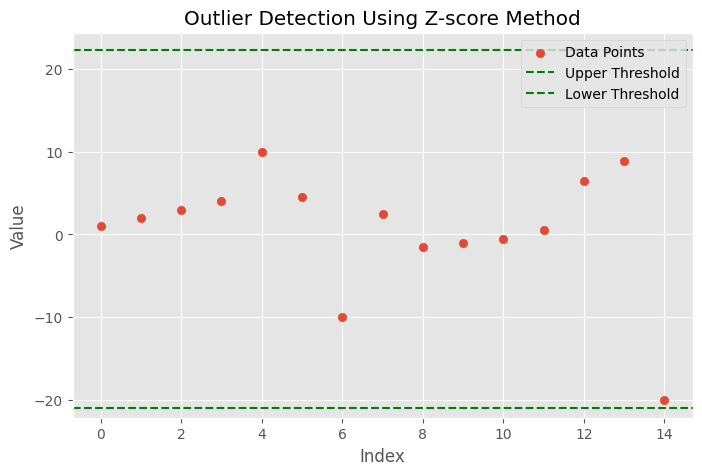

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/data3.csv')
X = df['Value'].values  # Extract the 'Value' column as a NumPy array

# Calculate mean and standard deviation
mean = np.mean(X)
std = np.std(X)

# Calculate Z-scores
z_scores = (X - mean) / std

# Define threshold for outlier detection
threshold = 3

# Detect outliers
outliers = np.where(np.abs(z_scores) > threshold)[0]

# Nicely formatted output
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std:.3f}")

print("\nZ-scores for each data point:")
for i, z in enumerate(z_scores):
    print(f"Index {i:2d}: Value = {X[i]:7.3f}, Z-score = {z:7.3f}")

if len(outliers) == 0:
    print("\nNo outliers detected based on the Z-score threshold.")
else:
    print(f"\nOutliers detected at indices: {list(outliers)}")
    print("Outlier values:", X[outliers])

# Plot data points and highlight outliers
plt.figure(figsize=(8, 5))
plt.scatter(range(len(X)), X, label='Data Points')
if len(outliers) > 0:
    plt.scatter(outliers, X[outliers], color='red', label='Outliers', s=100)
plt.axhline(mean + threshold*std, color='green', linestyle='--', label='Upper Threshold')
plt.axhline(mean - threshold*std, color='green', linestyle='--', label='Lower Threshold')
plt.title('Outlier Detection Using Z-score Method')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


#8.Write a program to perform outlier detection using IQR method.

Q1 (25th percentile): -0.755
Q3 (75th percentile): 4.250
IQR (Q3 - Q1): 5.005
Lower Bound: -8.263
Upper Bound: 11.758

Outliers detected at indices: [np.int64(6), np.int64(14)]
Outlier values: [-10. -20.]


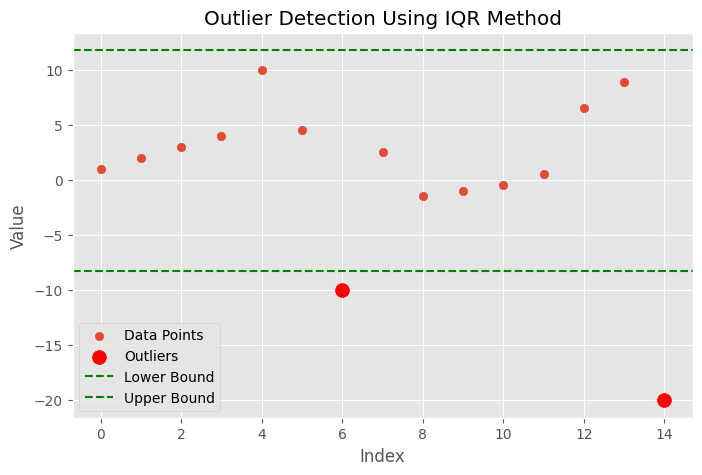

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv('/content/sample_data/data3.csv')  # adjust path if needed
X = df['Value'].values  # Extract 'Value' column as NumPy array

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = np.where((X < lower_bound) | (X > upper_bound))[0]


print(f"Q1 (25th percentile): {Q1:.3f}")
print(f"Q3 (75th percentile): {Q3:.3f}")
print(f"IQR (Q3 - Q1): {IQR:.3f}")
print(f"Lower Bound: {lower_bound:.3f}")
print(f"Upper Bound: {upper_bound:.3f}")

if len(outliers) == 0:
    print("\nNo outliers detected based on the IQR method.")
else:
    print(f"\nOutliers detected at indices: {list(outliers)}")
    print("Outlier values:", X[outliers])

# Plot data points and highlight outliers
plt.figure(figsize=(8, 5))
plt.scatter(range(len(X)), X, label='Data Points')
if len(outliers) > 0:
    plt.scatter(outliers, X[outliers], color='red', label='Outliers', s=100)
plt.axhline(lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Outlier Detection Using IQR Method')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


#9.Write a program to implement a mini-batch k-means algorithm.



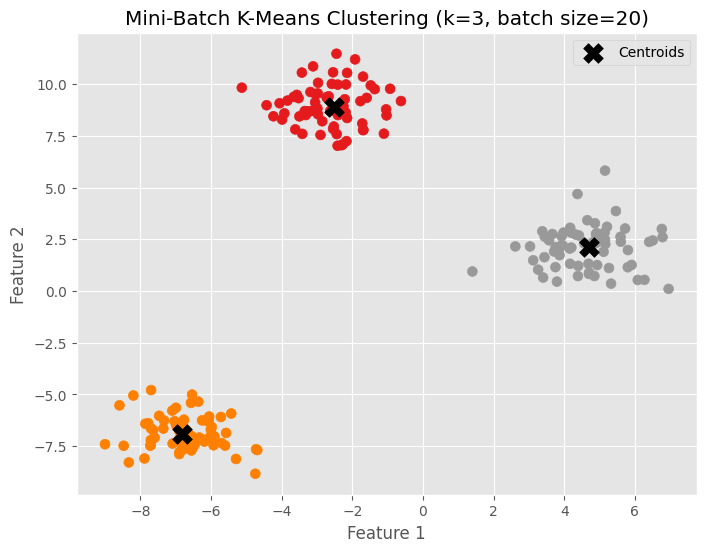

Cluster centers (k=3):
[[-2.5184752   8.91775287]
 [-6.81226827 -6.91499726]
 [ 4.70529014  2.13410961]]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Load dataset
df = pd.read_csv('/content/sample_data/data4.csv')
X = df[['Feature_1', 'Feature_2']].values

# Set number of clusters and batch size
k = 3
batch_size = 20

# Initialize and fit MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=42)
labels = mbk.fit_predict(X)

# Plot results
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=50)
plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title(f'Mini-Batch K-Means Clustering (k={k}, batch size={batch_size})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.show()

# Print cluster centers
print(f"Cluster centers (k={k}):")
print(mbk.cluster_centers_)


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
